# 回归

## 回归的一般方法
1. 收集数据：采用任意方法收集数据。
2. 准备数据：回归需要数值型数据，标称型数据将被转成二值型数据。
3. 分析数据：绘出数据的可视化二维图将有助于对数据做出理解和分析，在采用缩减法求得新回归系数之后，可以将新拟合线绘在图上作为对比。
4. 训练算法：找到回归系数。
5. 测试算法：使用$R^2$或者预测值和数据的拟合度，来分析模型的效果。
6. 使用算法：使用回归，可以在给定输入的时候预测出一个数值，这是对分类方法的提升，因为这样可以预测连续型数据而不仅仅是离散的类别标签。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 数据导入函数

In [2]:
def loadDataSet(fileName):
    numFeat = len(open(fileName).readline().split('\t')) - 1
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat, labelMat

## 线性回归
**优点：**结果易于理解，计算上不复杂。  
**缺点：**对非线性的数据拟合不好。  
**适用数据类型：**数值型和标称型数据。

### 标准回归函数
该函数解出$w$：$\hat{w}=(\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^Ty$

In [3]:
def standRegres(xArr, yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T * xMat
    # 计算行列式，如果行列式为0，则表示矩阵不可逆
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T * yMat)
    return ws

In [4]:
xArr, yArr = loadDataSet('./ex0.txt')

In [5]:
xArr[0:2]

[[1.0, 0.067732], [1.0, 0.42781]]

In [6]:
ws = standRegres(xArr, yArr)

In [7]:
ws

matrix([[3.00774324],
        [1.69532264]])

In [8]:
xMat = np.mat(xArr);yMat = np.mat(yArr)

为了和真实的y值区分开来，记为yHat

In [9]:
yHat = xMat * ws

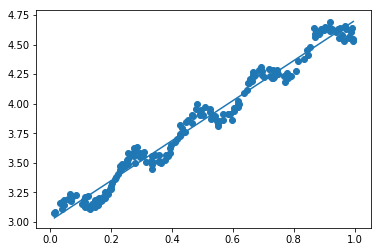

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax .scatter(xMat[:, 1].flatten().A[0], yMat.T[:, 0].flatten().A[0])

xCopy = xMat.copy()
# 如果直线上的数据点次序混乱，绘图时将会出现问题，因此要将点按照升序排列
xCopy.sort(0)
yHat = xCopy * ws
ax.plot(xCopy[:, 1], yHat)
plt.show()

### 计算相关系数
反映了拟合的效果，也就是预测值序列与真实值序列的匹配效果

In [11]:
yHat = xMat * ws

In [12]:
np.corrcoef(yHat.T, yMat)

array([[1.        , 0.98647356],
       [0.98647356, 1.        ]])

## 局部加权线性回归

### 回归函数
该算法解出回归系数$w$的公式为$\hat{w}=(\boldsymbol{X}^T\boldsymbol{WX})^{-1}\boldsymbol{X}^T\boldsymbol{W}y$

In [13]:
def lwlr(testPoint, xArr, yArr, k=1.0):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    m = np.shape(xMat)[0]
    # 创建对角矩阵
    weights = np.mat(np.eye(m))
    # 根据公式计算权重值大小以及指数级衰减
    for j in range(m):
        diffMat = testPoint - xMat[j, :]
        weights[j,j] = np.exp(diffMat * diffMat.T / (-2.0 * k**2))
    xTx = xMat.T * (weights * xMat)
    if np.linalg.det(xTx) == 0.0:
        print("This Matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T * (weights * yMat))
    return testPoint * ws

In [14]:
def lwlrTest(testArr, xArr, yArr, k=1.0):
    m = np.shape(testArr)[0]
    yHat = np.zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i], xArr, yArr, k)
    return yHat

### 对单点进行估计

In [15]:
xArr, yArr = loadDataSet('ex0.txt')

In [16]:
yArr[0]

3.176513

In [17]:
lwlr(xArr[0], xArr, yArr, 1.0)

matrix([[3.12204471]])

In [18]:
lwlr(xArr[0], xArr, yArr, 0.001)

matrix([[3.20175729]])

### 得到数据集里所有点的估计

In [19]:
yHat = lwlrTest(xArr, xArr, yArr, 0.003)

### 绘出估计值和原始值，看看yHat的拟合效果

In [20]:
xMat = np.mat(xArr)
strInd = xMat[:, 1].argsort(0)
xSort = xMat[strInd][:, 0, :]

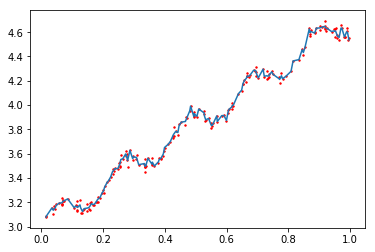

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xSort[:,1], yHat[strInd])
ax.scatter(xMat[:, 1].flatten().A[0], np.mat(yArr).T.flatten().A[0], s=2, c='red')
plt.show()

## 岭回归

回归系数的计算公式：$\hat{w}=(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I})^{-1}\boldsymbol{X}^Ty$

In [22]:
def ridgeRegres(xMat, yMat, lam=0.2):
    xTx = xMat.T * xMat
    denom = xTx + np.eye(np.shape(xMat)[1]) * lam
    if np.linalg.det(denom) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = denom.I * (xMat.T * yMat)
    return ws

In [23]:
def ridgeTest(xArr, yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    yMean = np.mean(yMat, 0)
    # 数据标准化，所有特征都减去各自的均值并除以方差
    yMat = yMat - yMean
    xMeans = np.mean(xMat, 0)
    xVar = np.var(xMat, 0)
    xMat = (xMat - xMeans) / xVar
    # 在一组lambda上做测试
    numTestPts = 30
    wMat = np.zeros((numTestPts, np.shape(xMat)[1]))
    for i in range(numTestPts):
        ws = ridgeRegres(xMat, yMat, np.exp(i-10))
        wMat[i,:] = ws.T
    return wMat

In [24]:
abX, abY = loadDataSet('abalone.txt')

In [25]:
ridgeWeights = ridgeTest(abX, abY)

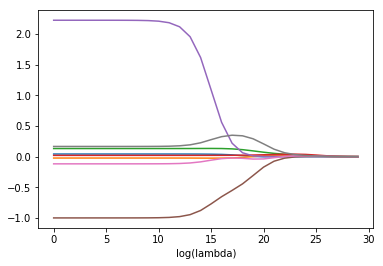

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ridgeWeights)
plt.xlabel('log(lambda)')
plt.show()

## 前向逐步回归
该算法的伪代码：  
数据标准化，使其分布满足0均值和单位方差  
在每轮迭代过程中：  
&emsp;&emsp;设置当前最小误差lowestError为正无穷  
&emsp;&emsp;对每个特征：  
&emsp;&emsp;&emsp;&emsp;增大或缩小：  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;改变一个系数得到一个新的W  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;计算新W下的误差  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;如果误差Error小于当前最小误差lowestError：设置Wbest等于当前的W  
&emsp;&emsp;&emsp;&emsp;将W设置为新的Wbest

In [27]:
def regularize(xMat):#regularize by columns
    inMat = xMat.copy()
    inMeans = np.mean(inMat,0)   #calc mean then subtract it off
    inVar = np.var(inMat,0)      #calc variance of Xi then divide by it
    inMat = (inMat - inMeans)/inVar
    return inMat

In [28]:
def rssError(yArr, yHatArr):
    return ((yArr - yHatArr) ** 2).sum()

In [29]:
# xArr：输入数据，yArr: 预测变量，eps：每次迭代需要调整的步长，numIt: 迭代次数
def stageWise(xArr, yArr, eps=0.01, numIt=100):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    # 进行标准化处理（方差为1，均值为0）
    yMean = np.mean(yMat, 0)
    yMat = yMat - yMean
    xMat = regularize(xMat)
    m,n = np.shape(xMat)
    returnMat = np.zeros((numIt,n))
    ws = np.zeros((n,1)); wsTest = ws.copy(); wsMax = ws.copy()
    for i in range(numIt):
        print(ws.T)
        lowestError = np.inf
         # 贪心算法
        for j in range(n):
            for sign in [-1,1]:
                wsTest = ws.copy()
                wsTest[j] += eps * sign
                yTest = xMat * wsTest
                rssE = rssError(yMat.A, yTest.A)
                # 取最小的误差
                if rssE < lowestError:
                    lowestError = rssE
                    wsMax = wsTest
        ws = wsMax.copy()
        returnMat[i, :] = ws.T
    return returnMat

In [30]:
xArr, yArr = loadDataSet('abalone.txt')

In [31]:
stageWise(xArr, yArr, 0.01, 200)

[[0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.   0.   0.   0.01 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.02 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.03 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.04 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.05 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.06 0.   0.   0.   0.  ]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.  ]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.01]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.02]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.03]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.04]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.05]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.06]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.07]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.08]]
[[0.   0.   0.01 0.05 0.   0.   0.   0.08]]
[[0.   0.   0.01 0.05 0.   0.   0.   0.09]]
[[0.   0.   0.01 0.05 0.   0.   0.   0.1 ]]
[[0.   0.   0.01 0.05 0.   0.   0.   0.11]]
[[ 0.    0.    0.01  0.05  0.   -0.01  0.    0.11]]
[[ 0.    0.    0.01  0.05  0.   -0.02  0.    0.11]]
[[ 0.    0.    0.01  0.05  0.   

[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]


array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.04,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36]])

In [32]:
stageWise(xArr, yArr, 0.001, 5000)

[[0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.    0.    0.    0.001 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.002 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.003 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.004 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.005 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.006 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.007 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.008 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.009 0.    0.    0.    0.   ]]
[[0.   0.   0.   0.01 0.   0.   0.   0.  ]]
[[0.    0.    0.    0.011 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.012 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.013 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.014 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.015 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.016 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.017 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.018 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.019 0.    0.    0.    

[[0.    0.    0.005 0.055 0.    0.    0.    0.09 ]]
[[0.    0.    0.005 0.054 0.    0.    0.    0.09 ]]
[[0.    0.    0.005 0.054 0.    0.    0.    0.091]]
[[0.    0.    0.005 0.054 0.    0.    0.    0.092]]
[[0.    0.    0.005 0.054 0.    0.    0.    0.093]]
[[0.    0.    0.005 0.054 0.    0.    0.    0.094]]
[[0.    0.    0.005 0.053 0.    0.    0.    0.094]]
[[0.    0.    0.005 0.053 0.    0.    0.    0.095]]
[[0.    0.    0.005 0.053 0.    0.    0.    0.096]]
[[0.    0.    0.005 0.053 0.    0.    0.    0.097]]
[[0.    0.    0.005 0.053 0.    0.    0.    0.098]]
[[0.    0.    0.005 0.052 0.    0.    0.    0.098]]
[[0.    0.    0.005 0.052 0.    0.    0.    0.099]]
[[0.    0.    0.005 0.052 0.    0.    0.    0.1  ]]
[[0.    0.    0.005 0.052 0.    0.    0.    0.101]]
[[0.    0.    0.005 0.052 0.    0.    0.    0.102]]
[[0.    0.    0.005 0.051 0.    0.    0.    0.102]]
[[0.    0.    0.005 0.051 0.    0.    0.    0.103]]
[[0.    0.    0.005 0.051 0.    0.    0.    0.104]]
[[0.    0.  

[[ 0.     0.     0.005  0.044  0.    -0.086  0.     0.181]]
[[ 0.     0.     0.005  0.044  0.    -0.087  0.     0.181]]
[[ 0.     0.     0.005  0.044  0.    -0.088  0.     0.181]]
[[ 0.     0.     0.005  0.044  0.    -0.088  0.     0.182]]
[[ 0.     0.     0.005  0.044  0.    -0.089  0.     0.182]]
[[ 0.     0.     0.005  0.044  0.    -0.089  0.     0.183]]
[[ 0.     0.     0.005  0.044  0.    -0.09   0.     0.183]]
[[ 0.     0.     0.005  0.044  0.    -0.091  0.     0.183]]
[[ 0.     0.     0.005  0.044  0.    -0.091  0.     0.184]]
[[ 0.     0.     0.005  0.044  0.    -0.092  0.     0.184]]
[[ 0.     0.     0.005  0.044  0.    -0.093  0.     0.184]]
[[ 0.     0.     0.005  0.044  0.    -0.093  0.     0.185]]
[[ 0.     0.     0.005  0.044  0.    -0.094  0.     0.185]]
[[ 0.     0.     0.005  0.044  0.    -0.094  0.     0.186]]
[[ 0.     0.     0.005  0.043  0.    -0.094  0.     0.186]]
[[ 0.     0.     0.005  0.043  0.    -0.094  0.     0.187]]
[[ 0.     0.     0.005  0.043  0.    -0.

[[ 0.     0.     0.013  0.041  0.    -0.165  0.     0.227]]
[[ 0.     0.     0.013  0.041  0.    -0.166  0.     0.227]]
[[ 0.     0.     0.013  0.041  0.    -0.167  0.     0.227]]
[[ 0.     0.     0.014  0.041  0.    -0.167  0.     0.227]]
[[ 0.     0.     0.014  0.041  0.    -0.168  0.     0.227]]
[[ 0.     0.     0.014  0.041  0.    -0.169  0.     0.227]]
[[ 0.     0.     0.014  0.041  0.    -0.169  0.     0.228]]
[[ 0.     0.     0.014  0.041  0.    -0.17   0.     0.228]]
[[ 0.     0.     0.014  0.041  0.    -0.171  0.     0.228]]
[[ 0.     0.     0.014  0.041  0.    -0.171  0.     0.229]]
[[ 0.     0.     0.014  0.041  0.    -0.172  0.     0.229]]
[[ 0.     0.     0.014  0.041  0.    -0.172  0.     0.23 ]]
[[ 0.     0.     0.014  0.041  0.    -0.173  0.     0.23 ]]
[[ 0.     0.     0.014  0.041  0.    -0.174  0.     0.23 ]]
[[ 0.     0.     0.015  0.041  0.    -0.174  0.     0.23 ]]
[[ 0.     0.     0.015  0.04   0.    -0.174  0.     0.23 ]]
[[ 0.     0.     0.016  0.04   0.    -0.

[[ 0.     0.     0.035  0.037  0.    -0.254  0.     0.262]]
[[ 0.     0.     0.036  0.037  0.    -0.254  0.     0.262]]
[[ 0.     0.     0.036  0.037  0.    -0.255  0.     0.262]]
[[ 0.     0.     0.036  0.037  0.    -0.256  0.     0.262]]
[[ 0.     0.     0.036  0.037  0.    -0.256  0.     0.263]]
[[ 0.     0.     0.036  0.037  0.    -0.257  0.     0.263]]
[[ 0.     0.     0.036  0.037  0.    -0.258  0.     0.263]]
[[ 0.     0.     0.037  0.037  0.    -0.258  0.     0.263]]
[[ 0.     0.     0.037  0.037  0.    -0.259  0.     0.263]]
[[ 0.     0.     0.037  0.037  0.    -0.26   0.     0.263]]
[[ 0.     0.     0.037  0.037  0.    -0.26   0.     0.264]]
[[ 0.     0.     0.037  0.037  0.    -0.261  0.     0.264]]
[[ 0.     0.     0.037  0.037  0.    -0.261  0.     0.265]]
[[ 0.     0.     0.037  0.036  0.    -0.261  0.     0.265]]
[[ 0.     0.     0.038  0.036  0.    -0.261  0.     0.265]]
[[ 0.     0.     0.038  0.036  0.    -0.261  0.     0.266]]
[[ 0.     0.     0.038  0.036  0.    -0.

[[ 0.     0.     0.061  0.032  0.    -0.35   0.     0.301]]
[[ 0.     0.     0.061  0.032  0.    -0.351  0.     0.301]]
[[ 0.     0.     0.061  0.032  0.    -0.351  0.     0.302]]
[[ 0.     0.     0.061  0.032  0.    -0.352  0.     0.302]]
[[ 0.     0.     0.061  0.032  0.    -0.353  0.     0.302]]
[[ 0.     0.     0.062  0.032  0.    -0.353  0.     0.302]]
[[ 0.     0.     0.062  0.032  0.    -0.354  0.     0.302]]
[[ 0.     0.     0.062  0.032  0.    -0.355  0.     0.302]]
[[ 0.     0.     0.062  0.032  0.    -0.355  0.     0.303]]
[[ 0.     0.     0.062  0.032  0.    -0.356  0.     0.303]]
[[ 0.     0.     0.062  0.032  0.    -0.357  0.     0.303]]
[[ 0.     0.     0.062  0.032  0.    -0.357  0.     0.304]]
[[ 0.     0.     0.062  0.032  0.    -0.358  0.     0.304]]
[[ 0.     0.     0.062  0.032  0.    -0.358  0.     0.305]]
[[ 0.     0.     0.062  0.032  0.    -0.359  0.     0.305]]
[[ 0.     0.     0.062  0.032  0.    -0.36   0.     0.305]]
[[ 0.     0.     0.063  0.032  0.    -0.

[[ 0.     0.     0.081  0.029  0.    -0.433  0.     0.334]]
[[ 0.     0.     0.081  0.028  0.    -0.433  0.     0.334]]
[[ 0.     0.     0.082  0.028  0.    -0.433  0.     0.334]]
[[ 0.     0.     0.082  0.028  0.    -0.433  0.     0.335]]
[[ 0.     0.     0.082  0.028  0.    -0.434  0.     0.335]]
[[ 0.     0.     0.082  0.028  0.    -0.434  0.     0.336]]
[[ 0.     0.     0.082  0.028  0.    -0.435  0.     0.336]]
[[ 0.     0.     0.082  0.028  0.    -0.436  0.     0.336]]
[[ 0.     0.     0.083  0.028  0.    -0.436  0.     0.336]]
[[ 0.     0.     0.083  0.028  0.    -0.437  0.     0.336]]
[[ 0.     0.     0.083  0.028  0.    -0.438  0.     0.336]]
[[ 0.     0.     0.083  0.028  0.    -0.438  0.     0.337]]
[[ 0.     0.     0.083  0.028  0.    -0.439  0.     0.337]]
[[ 0.     0.     0.083  0.028  0.    -0.44   0.     0.337]]
[[ 0.     0.     0.084  0.028  0.    -0.44   0.     0.337]]
[[ 0.     0.     0.084  0.028  0.    -0.441  0.     0.337]]
[[ 0.     0.     0.084  0.028  0.    -0.

[[ 0.     0.     0.105  0.024  0.    -0.523  0.     0.37 ]]
[[ 0.     0.     0.105  0.024  0.    -0.523  0.     0.371]]
[[ 0.     0.     0.105  0.024  0.    -0.524  0.     0.371]]
[[ 0.     0.     0.105  0.024  0.    -0.525  0.     0.371]]
[[ 0.     0.     0.105  0.024  0.    -0.525  0.     0.372]]
[[ 0.     0.     0.105  0.024  0.    -0.526  0.     0.372]]
[[ 0.     0.     0.105  0.024  0.    -0.527  0.     0.372]]
[[ 0.     0.     0.106  0.024  0.    -0.527  0.     0.372]]
[[ 0.     0.     0.106  0.024  0.    -0.528  0.     0.372]]
[[ 0.     0.     0.106  0.024  0.    -0.529  0.     0.372]]
[[ 0.     0.     0.106  0.024  0.    -0.529  0.     0.373]]
[[ 0.     0.     0.106  0.024  0.    -0.53   0.     0.373]]
[[ 0.     0.     0.106  0.024  0.    -0.53   0.     0.374]]
[[ 0.     0.     0.106  0.024  0.    -0.531  0.     0.374]]
[[ 0.     0.     0.106  0.024  0.    -0.532  0.     0.374]]
[[ 0.     0.     0.107  0.024  0.    -0.532  0.     0.374]]
[[ 0.     0.     0.107  0.024  0.    -0.

[[ 0.     0.     0.109  0.023  0.085 -0.571  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.085 -0.572  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.086 -0.572  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.087 -0.572  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.087 -0.573  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.088 -0.573  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.089 -0.573  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.089 -0.574  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.09  -0.574  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.091 -0.574  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.091 -0.575  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.092 -0.575  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.093 -0.575  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.094 -0.575  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.094 -0.575 -0.001  0.374]]
[[ 0.     0.     0.109  0.023  0.095 -0.575 -0.001  0.374]]
[[ 0.     0.     0.109  0.023  0.096 -0.

[[ 0.005  0.     0.11   0.022  0.198 -0.6   -0.009  0.372]]
[[ 0.005  0.     0.11   0.022  0.199 -0.6   -0.009  0.372]]
[[ 0.006  0.     0.11   0.022  0.199 -0.6   -0.009  0.372]]
[[ 0.006  0.     0.11   0.022  0.2   -0.6   -0.009  0.372]]
[[ 0.006  0.     0.11   0.022  0.2   -0.6   -0.01   0.372]]
[[ 0.006  0.     0.11   0.022  0.201 -0.6   -0.01   0.372]]
[[ 0.006  0.     0.11   0.022  0.202 -0.6   -0.01   0.372]]
[[ 0.006  0.     0.11   0.022  0.203 -0.6   -0.01   0.372]]
[[ 0.006  0.     0.11   0.022  0.204 -0.6   -0.01   0.372]]
[[ 0.006  0.     0.11   0.022  0.204 -0.601 -0.01   0.372]]
[[ 0.006  0.     0.11   0.022  0.205 -0.601 -0.01   0.372]]
[[ 0.006  0.     0.11   0.022  0.206 -0.601 -0.01   0.372]]
[[ 0.006  0.     0.11   0.022  0.206 -0.601 -0.01   0.371]]
[[ 0.006  0.     0.11   0.022  0.207 -0.601 -0.01   0.371]]
[[ 0.006  0.     0.11   0.022  0.208 -0.601 -0.01   0.371]]
[[ 0.006  0.     0.11   0.022  0.209 -0.601 -0.01   0.371]]
[[ 0.006  0.     0.11   0.022  0.209 -0.

[[ 0.008  0.     0.11   0.022  0.326 -0.624 -0.016  0.359]]
[[ 0.008  0.     0.11   0.022  0.326 -0.625 -0.016  0.359]]
[[ 0.008  0.     0.11   0.022  0.327 -0.625 -0.016  0.359]]
[[ 0.008  0.     0.11   0.022  0.328 -0.625 -0.016  0.359]]
[[ 0.008  0.     0.11   0.022  0.328 -0.626 -0.016  0.359]]
[[ 0.008  0.     0.11   0.022  0.329 -0.626 -0.016  0.359]]
[[ 0.008  0.     0.11   0.022  0.33  -0.626 -0.016  0.359]]
[[ 0.008  0.     0.11   0.022  0.33  -0.627 -0.016  0.359]]
[[ 0.008  0.     0.11   0.022  0.331 -0.627 -0.016  0.359]]
[[ 0.008  0.     0.11   0.022  0.332 -0.627 -0.016  0.359]]
[[ 0.009  0.     0.11   0.022  0.332 -0.627 -0.016  0.359]]
[[ 0.009  0.     0.11   0.022  0.332 -0.627 -0.016  0.358]]
[[ 0.009  0.     0.11   0.022  0.333 -0.627 -0.016  0.358]]
[[ 0.009  0.     0.11   0.022  0.334 -0.627 -0.016  0.358]]
[[ 0.009  0.     0.11   0.022  0.335 -0.627 -0.016  0.358]]
[[ 0.009  0.     0.11   0.022  0.336 -0.627 -0.016  0.358]]
[[ 0.009  0.     0.11   0.022  0.336 -0.

[[ 0.011  0.     0.11   0.022  0.446 -0.649 -0.022  0.347]]
[[ 0.011  0.     0.11   0.022  0.447 -0.649 -0.022  0.347]]
[[ 0.011  0.     0.11   0.022  0.447 -0.649 -0.023  0.347]]
[[ 0.011  0.     0.11   0.022  0.448 -0.649 -0.023  0.347]]
[[ 0.011  0.     0.11   0.022  0.449 -0.649 -0.023  0.347]]
[[ 0.011  0.     0.11   0.022  0.45  -0.649 -0.023  0.347]]
[[ 0.011  0.     0.11   0.022  0.451 -0.649 -0.023  0.347]]
[[ 0.011  0.     0.11   0.022  0.451 -0.65  -0.023  0.347]]
[[ 0.011  0.     0.11   0.022  0.452 -0.65  -0.023  0.347]]
[[ 0.011  0.     0.11   0.022  0.453 -0.65  -0.023  0.347]]
[[ 0.011  0.     0.11   0.022  0.453 -0.65  -0.023  0.346]]
[[ 0.011  0.     0.11   0.022  0.454 -0.65  -0.023  0.346]]
[[ 0.011  0.     0.11   0.022  0.455 -0.65  -0.023  0.346]]
[[ 0.011  0.     0.11   0.022  0.456 -0.65  -0.023  0.346]]
[[ 0.011  0.     0.11   0.022  0.456 -0.651 -0.023  0.346]]
[[ 0.011  0.     0.11   0.022  0.457 -0.651 -0.023  0.346]]
[[ 0.011  0.     0.11   0.022  0.458 -0.

[[ 0.013  0.     0.11   0.022  0.563 -0.671 -0.029  0.335]]
[[ 0.013  0.     0.11   0.022  0.564 -0.671 -0.029  0.335]]
[[ 0.013  0.     0.11   0.022  0.565 -0.671 -0.029  0.335]]
[[ 0.013  0.     0.11   0.022  0.565 -0.672 -0.029  0.335]]
[[ 0.013  0.     0.11   0.022  0.566 -0.672 -0.029  0.335]]
[[ 0.013  0.     0.11   0.022  0.567 -0.672 -0.029  0.335]]
[[ 0.013  0.     0.11   0.022  0.567 -0.673 -0.029  0.335]]
[[ 0.013  0.     0.11   0.022  0.568 -0.673 -0.029  0.335]]
[[ 0.013  0.     0.11   0.022  0.569 -0.673 -0.029  0.335]]
[[ 0.013  0.     0.11   0.022  0.57  -0.673 -0.029  0.335]]
[[ 0.013  0.     0.11   0.022  0.57  -0.673 -0.029  0.334]]
[[ 0.013  0.     0.11   0.022  0.571 -0.673 -0.029  0.334]]
[[ 0.013  0.     0.11   0.022  0.572 -0.673 -0.029  0.334]]
[[ 0.013  0.     0.11   0.022  0.573 -0.673 -0.029  0.334]]
[[ 0.013  0.     0.11   0.022  0.573 -0.674 -0.029  0.334]]
[[ 0.013  0.     0.11   0.022  0.574 -0.674 -0.029  0.334]]
[[ 0.013  0.     0.11   0.022  0.575 -0.

[[ 0.015  0.     0.11   0.022  0.678 -0.696 -0.034  0.323]]
[[ 0.015  0.     0.11   0.022  0.679 -0.696 -0.034  0.323]]
[[ 0.015  0.     0.11   0.022  0.68  -0.696 -0.034  0.323]]
[[ 0.015  0.     0.11   0.022  0.681 -0.696 -0.034  0.323]]
[[ 0.015  0.     0.11   0.022  0.682 -0.696 -0.034  0.323]]
[[ 0.015  0.     0.11   0.022  0.682 -0.696 -0.035  0.323]]
[[ 0.015  0.     0.11   0.022  0.683 -0.696 -0.035  0.323]]
[[ 0.015  0.     0.11   0.022  0.684 -0.696 -0.035  0.323]]
[[ 0.015  0.     0.11   0.022  0.685 -0.696 -0.035  0.323]]
[[ 0.015  0.     0.11   0.022  0.686 -0.696 -0.035  0.323]]
[[ 0.015  0.     0.11   0.022  0.686 -0.697 -0.035  0.323]]
[[ 0.015  0.     0.11   0.022  0.687 -0.697 -0.035  0.323]]
[[ 0.015  0.     0.11   0.022  0.688 -0.697 -0.035  0.323]]
[[ 0.015  0.     0.11   0.022  0.688 -0.698 -0.035  0.323]]
[[ 0.015  0.     0.11   0.022  0.689 -0.698 -0.035  0.323]]
[[ 0.015  0.     0.11   0.022  0.69  -0.698 -0.035  0.323]]
[[ 0.015  0.     0.11   0.022  0.69  -0.

[[ 0.017  0.     0.11   0.022  0.803 -0.72  -0.041  0.311]]
[[ 0.017  0.     0.11   0.022  0.804 -0.72  -0.041  0.311]]
[[ 0.018  0.     0.11   0.022  0.804 -0.72  -0.041  0.311]]
[[ 0.018  0.     0.11   0.022  0.805 -0.72  -0.041  0.311]]
[[ 0.018  0.     0.11   0.022  0.805 -0.72  -0.042  0.311]]
[[ 0.018  0.     0.11   0.022  0.806 -0.72  -0.042  0.311]]
[[ 0.018  0.     0.11   0.022  0.807 -0.72  -0.042  0.311]]
[[ 0.018  0.     0.11   0.022  0.808 -0.72  -0.042  0.311]]
[[ 0.018  0.     0.11   0.022  0.809 -0.72  -0.042  0.311]]
[[ 0.018  0.     0.11   0.022  0.809 -0.721 -0.042  0.311]]
[[ 0.018  0.     0.11   0.022  0.81  -0.721 -0.042  0.311]]
[[ 0.018  0.     0.11   0.022  0.811 -0.721 -0.042  0.311]]
[[ 0.018  0.     0.11   0.022  0.811 -0.721 -0.042  0.31 ]]
[[ 0.018  0.     0.11   0.022  0.812 -0.721 -0.042  0.31 ]]
[[ 0.018  0.     0.11   0.022  0.813 -0.721 -0.042  0.31 ]]
[[ 0.018  0.     0.11   0.022  0.814 -0.721 -0.042  0.31 ]]
[[ 0.018  0.     0.11   0.022  0.814 -0.

[[ 0.02   0.     0.11   0.022  0.921 -0.743 -0.047  0.299]]
[[ 0.02   0.     0.11   0.022  0.921 -0.744 -0.047  0.299]]
[[ 0.02   0.     0.11   0.022  0.922 -0.744 -0.047  0.299]]
[[ 0.02   0.     0.11   0.022  0.923 -0.744 -0.047  0.299]]
[[ 0.02   0.     0.11   0.022  0.923 -0.745 -0.047  0.299]]
[[ 0.02   0.     0.11   0.022  0.924 -0.745 -0.047  0.299]]
[[ 0.02   0.     0.11   0.022  0.925 -0.745 -0.047  0.299]]
[[ 0.02   0.     0.11   0.022  0.925 -0.745 -0.047  0.298]]
[[ 0.02   0.     0.11   0.022  0.926 -0.745 -0.047  0.298]]
[[ 0.02   0.     0.11   0.022  0.927 -0.745 -0.047  0.298]]
[[ 0.02   0.     0.11   0.022  0.928 -0.745 -0.047  0.298]]
[[ 0.02   0.     0.11   0.022  0.929 -0.745 -0.047  0.298]]
[[ 0.02   0.     0.11   0.022  0.929 -0.745 -0.048  0.298]]
[[ 0.02   0.     0.11   0.022  0.93  -0.745 -0.048  0.298]]
[[ 0.02   0.     0.11   0.022  0.931 -0.745 -0.048  0.298]]
[[ 0.02   0.     0.11   0.022  0.932 -0.745 -0.048  0.298]]
[[ 0.02   0.     0.11   0.022  0.933 -0.

[[ 0.023  0.     0.11   0.022  1.049 -0.768 -0.054  0.286]]
[[ 0.023  0.     0.11   0.022  1.049 -0.769 -0.054  0.286]]
[[ 0.023  0.     0.11   0.022  1.05  -0.769 -0.054  0.286]]
[[ 0.023  0.     0.11   0.022  1.051 -0.769 -0.054  0.286]]
[[ 0.023  0.     0.11   0.022  1.052 -0.769 -0.054  0.286]]
[[ 0.023  0.     0.11   0.022  1.052 -0.769 -0.055  0.286]]
[[ 0.023  0.     0.11   0.022  1.053 -0.769 -0.055  0.286]]
[[ 0.023  0.     0.11   0.022  1.054 -0.769 -0.055  0.286]]
[[ 0.023  0.     0.11   0.022  1.055 -0.769 -0.055  0.286]]
[[ 0.023  0.     0.11   0.022  1.056 -0.769 -0.055  0.286]]
[[ 0.023  0.     0.11   0.022  1.056 -0.77  -0.055  0.286]]
[[ 0.023  0.     0.11   0.022  1.057 -0.77  -0.055  0.286]]
[[ 0.023  0.     0.11   0.022  1.058 -0.77  -0.055  0.286]]
[[ 0.023  0.     0.11   0.022  1.058 -0.77  -0.055  0.285]]
[[ 0.023  0.     0.11   0.022  1.059 -0.77  -0.055  0.285]]
[[ 0.023  0.     0.11   0.022  1.06  -0.77  -0.055  0.285]]
[[ 0.023  0.     0.11   0.022  1.061 -0.

[[ 0.026  0.     0.11   0.022  1.175 -0.795 -0.061  0.274]]
[[ 0.026  0.     0.11   0.022  1.176 -0.795 -0.061  0.274]]
[[ 0.026  0.     0.11   0.022  1.177 -0.795 -0.061  0.274]]
[[ 0.026  0.     0.11   0.022  1.178 -0.795 -0.061  0.274]]
[[ 0.026  0.     0.11   0.022  1.179 -0.795 -0.061  0.274]]
[[ 0.026  0.     0.11   0.022  1.179 -0.795 -0.061  0.273]]
[[ 0.026  0.     0.11   0.022  1.18  -0.795 -0.061  0.273]]
[[ 0.026  0.     0.11   0.022  1.181 -0.795 -0.061  0.273]]
[[ 0.026  0.     0.11   0.022  1.182 -0.795 -0.061  0.273]]
[[ 0.026  0.     0.11   0.022  1.182 -0.796 -0.061  0.273]]
[[ 0.026  0.     0.11   0.022  1.183 -0.796 -0.061  0.273]]
[[ 0.026  0.     0.11   0.022  1.184 -0.796 -0.061  0.273]]
[[ 0.026  0.     0.11   0.022  1.184 -0.797 -0.061  0.273]]
[[ 0.026  0.     0.11   0.022  1.185 -0.797 -0.061  0.273]]
[[ 0.026  0.     0.11   0.022  1.186 -0.797 -0.061  0.273]]
[[ 0.026  0.     0.11   0.022  1.187 -0.797 -0.061  0.273]]
[[ 0.026  0.     0.11   0.022  1.187 -0.

[[ 0.028  0.     0.11   0.022  1.278 -0.815 -0.066  0.264]]
[[ 0.028  0.     0.11   0.022  1.278 -0.815 -0.066  0.263]]
[[ 0.028  0.     0.11   0.022  1.279 -0.815 -0.066  0.263]]
[[ 0.028  0.     0.11   0.022  1.28  -0.815 -0.066  0.263]]
[[ 0.028  0.     0.11   0.022  1.281 -0.815 -0.066  0.263]]
[[ 0.028  0.     0.11   0.022  1.281 -0.816 -0.066  0.263]]
[[ 0.028  0.     0.11   0.022  1.282 -0.816 -0.066  0.263]]
[[ 0.028  0.     0.11   0.022  1.283 -0.816 -0.066  0.263]]
[[ 0.028  0.     0.11   0.022  1.283 -0.816 -0.066  0.262]]
[[ 0.028  0.     0.11   0.022  1.284 -0.816 -0.066  0.262]]
[[ 0.028  0.     0.11   0.022  1.285 -0.816 -0.066  0.262]]
[[ 0.028  0.     0.11   0.022  1.286 -0.816 -0.066  0.262]]
[[ 0.028  0.     0.11   0.022  1.286 -0.817 -0.066  0.262]]
[[ 0.028  0.     0.11   0.022  1.287 -0.817 -0.066  0.262]]
[[ 0.028  0.     0.11   0.022  1.288 -0.817 -0.066  0.262]]
[[ 0.028  0.     0.11   0.022  1.289 -0.817 -0.066  0.262]]
[[ 0.028  0.     0.11   0.022  1.289 -0.

[[ 0.03   0.     0.11   0.022  1.401 -0.839 -0.073  0.251]]
[[ 0.03   0.     0.11   0.022  1.402 -0.839 -0.073  0.251]]
[[ 0.03   0.     0.11   0.022  1.403 -0.839 -0.073  0.251]]
[[ 0.03   0.     0.11   0.022  1.404 -0.839 -0.073  0.251]]
[[ 0.03   0.     0.11   0.022  1.404 -0.839 -0.073  0.25 ]]
[[ 0.03   0.     0.11   0.022  1.405 -0.839 -0.073  0.25 ]]
[[ 0.03   0.     0.11   0.022  1.406 -0.839 -0.073  0.25 ]]
[[ 0.03   0.     0.11   0.022  1.407 -0.839 -0.073  0.25 ]]
[[ 0.03   0.     0.11   0.022  1.407 -0.84  -0.073  0.25 ]]
[[ 0.03   0.     0.11   0.022  1.408 -0.84  -0.073  0.25 ]]
[[ 0.03   0.     0.11   0.022  1.409 -0.84  -0.073  0.25 ]]
[[ 0.03   0.     0.11   0.022  1.409 -0.841 -0.073  0.25 ]]
[[ 0.03   0.     0.11   0.022  1.41  -0.841 -0.073  0.25 ]]
[[ 0.03   0.     0.11   0.022  1.411 -0.841 -0.073  0.25 ]]
[[ 0.03   0.     0.11   0.022  1.412 -0.841 -0.073  0.25 ]]
[[ 0.03   0.     0.11   0.022  1.412 -0.841 -0.074  0.25 ]]
[[ 0.03   0.     0.11   0.022  1.413 -0.

  -7.800e-02  2.410e-01]]
[[ 3.200e-02 -1.000e-03  1.110e-01  2.200e-02  1.499e+00 -8.580e-01
  -7.800e-02  2.410e-01]]
[[ 3.20e-02 -1.00e-03  1.11e-01  2.20e-02  1.50e+00 -8.58e-01 -7.80e-02
   2.41e-01]]
[[ 3.20e-02 -1.00e-03  1.11e-01  2.20e-02  1.50e+00 -8.58e-01 -7.80e-02
   2.40e-01]]
[[ 3.200e-02 -1.000e-03  1.110e-01  2.200e-02  1.501e+00 -8.580e-01
  -7.800e-02  2.400e-01]]
[[ 3.200e-02 -1.000e-03  1.110e-01  2.200e-02  1.502e+00 -8.580e-01
  -7.800e-02  2.400e-01]]
[[ 3.200e-02 -1.000e-03  1.110e-01  2.200e-02  1.503e+00 -8.580e-01
  -7.800e-02  2.400e-01]]
[[ 3.200e-02 -1.000e-03  1.110e-01  2.200e-02  1.503e+00 -8.590e-01
  -7.800e-02  2.400e-01]]
[[ 3.200e-02 -1.000e-03  1.110e-01  2.200e-02  1.504e+00 -8.590e-01
  -7.800e-02  2.400e-01]]
[[ 3.200e-02 -1.000e-03  1.110e-01  2.200e-02  1.505e+00 -8.590e-01
  -7.800e-02  2.400e-01]]
[[ 3.200e-02 -1.000e-03  1.110e-01  2.200e-02  1.505e+00 -8.600e-01
  -7.800e-02  2.400e-01]]
[[ 3.200e-02 -1.000e-03  1.110e-01  2.200e-02  1.5

[[ 0.034 -0.003  0.113  0.022  1.577 -0.874 -0.082  0.232]]
[[ 0.034 -0.003  0.113  0.022  1.578 -0.874 -0.082  0.232]]
[[ 0.034 -0.003  0.113  0.022  1.579 -0.874 -0.082  0.232]]
[[ 0.034 -0.003  0.113  0.022  1.58  -0.874 -0.082  0.232]]
[[ 0.034 -0.003  0.113  0.022  1.58  -0.875 -0.082  0.232]]
[[ 0.034 -0.003  0.113  0.022  1.581 -0.875 -0.082  0.232]]
[[ 0.034 -0.003  0.113  0.022  1.582 -0.875 -0.082  0.232]]
[[ 0.034 -0.003  0.113  0.022  1.583 -0.875 -0.082  0.232]]
[[ 0.034 -0.003  0.113  0.022  1.583 -0.875 -0.083  0.232]]
[[ 0.034 -0.003  0.113  0.022  1.584 -0.875 -0.083  0.232]]
[[ 0.034 -0.003  0.113  0.022  1.585 -0.875 -0.083  0.232]]
[[ 0.034 -0.003  0.113  0.022  1.586 -0.875 -0.083  0.232]]
[[ 0.034 -0.003  0.113  0.022  1.587 -0.875 -0.083  0.232]]
[[ 0.034 -0.003  0.113  0.022  1.587 -0.876 -0.083  0.232]]
[[ 0.034 -0.003  0.113  0.022  1.588 -0.876 -0.083  0.232]]
[[ 0.034 -0.003  0.113  0.022  1.589 -0.876 -0.083  0.232]]
[[ 0.034 -0.003  0.113  0.022  1.589 -0.

[[ 0.036 -0.003  0.113  0.022  1.684 -0.895 -0.088  0.222]]
[[ 0.036 -0.003  0.113  0.022  1.685 -0.895 -0.088  0.222]]
[[ 0.036 -0.003  0.113  0.022  1.686 -0.895 -0.088  0.222]]
[[ 0.036 -0.003  0.113  0.022  1.686 -0.895 -0.088  0.221]]
[[ 0.036 -0.003  0.113  0.022  1.687 -0.895 -0.088  0.221]]
[[ 0.036 -0.003  0.113  0.022  1.688 -0.895 -0.088  0.221]]
[[ 0.036 -0.003  0.113  0.022  1.689 -0.895 -0.088  0.221]]
[[ 0.036 -0.003  0.113  0.022  1.689 -0.896 -0.088  0.221]]
[[ 0.036 -0.003  0.113  0.022  1.69  -0.896 -0.088  0.221]]
[[ 0.036 -0.003  0.113  0.022  1.691 -0.896 -0.088  0.221]]
[[ 0.036 -0.003  0.113  0.022  1.691 -0.897 -0.088  0.221]]
[[ 0.036 -0.003  0.113  0.022  1.692 -0.897 -0.088  0.221]]
[[ 0.036 -0.003  0.113  0.022  1.693 -0.897 -0.088  0.221]]
[[ 0.036 -0.003  0.113  0.022  1.694 -0.897 -0.088  0.221]]
[[ 0.036 -0.003  0.113  0.022  1.694 -0.897 -0.089  0.221]]
[[ 0.036 -0.003  0.114  0.022  1.694 -0.897 -0.089  0.221]]
[[ 0.036 -0.004  0.114  0.022  1.694 -0.

[[ 0.039 -0.006  0.116  0.022  1.801 -0.918 -0.094  0.209]]
[[ 0.039 -0.006  0.116  0.022  1.802 -0.918 -0.094  0.209]]
[[ 0.039 -0.006  0.116  0.022  1.803 -0.918 -0.094  0.209]]
[[ 0.039 -0.006  0.116  0.022  1.803 -0.919 -0.094  0.209]]
[[ 0.039 -0.006  0.116  0.022  1.804 -0.919 -0.094  0.209]]
[[ 0.039 -0.006  0.116  0.022  1.805 -0.919 -0.094  0.209]]
[[ 0.039 -0.006  0.116  0.022  1.805 -0.92  -0.094  0.209]]
[[ 0.039 -0.006  0.116  0.022  1.806 -0.92  -0.094  0.209]]
[[ 0.039 -0.006  0.116  0.022  1.807 -0.92  -0.094  0.209]]
[[ 0.039 -0.006  0.116  0.022  1.808 -0.92  -0.094  0.209]]
[[ 0.039 -0.006  0.116  0.022  1.808 -0.92  -0.094  0.208]]
[[ 0.039 -0.006  0.116  0.022  1.809 -0.92  -0.094  0.208]]
[[ 0.039 -0.006  0.116  0.022  1.81  -0.92  -0.094  0.208]]
[[ 0.039 -0.006  0.116  0.022  1.811 -0.92  -0.094  0.208]]
[[ 0.039 -0.006  0.116  0.022  1.811 -0.921 -0.094  0.208]]
[[ 0.039 -0.006  0.116  0.022  1.812 -0.921 -0.094  0.208]]
[[ 0.039 -0.006  0.116  0.022  1.813 -0.

[[ 0.04  -0.007  0.117  0.022  1.901 -0.939 -0.099  0.199]]
[[ 0.04  -0.007  0.117  0.022  1.902 -0.939 -0.099  0.199]]
[[ 0.04  -0.007  0.117  0.022  1.903 -0.939 -0.099  0.199]]
[[ 0.041 -0.007  0.117  0.022  1.903 -0.939 -0.099  0.199]]
[[ 0.041 -0.007  0.117  0.022  1.903 -0.94  -0.099  0.199]]
[[ 0.041 -0.007  0.117  0.022  1.904 -0.94  -0.099  0.199]]
[[ 0.041 -0.007  0.117  0.022  1.905 -0.94  -0.099  0.199]]
[[ 0.041 -0.007  0.117  0.022  1.906 -0.94  -0.099  0.199]]
[[ 0.041 -0.007  0.117  0.022  1.906 -0.94  -0.099  0.198]]
[[ 0.041 -0.007  0.117  0.022  1.907 -0.94  -0.099  0.198]]
[[ 0.041 -0.007  0.117  0.022  1.908 -0.94  -0.099  0.198]]
[[ 0.041 -0.007  0.117  0.022  1.909 -0.94  -0.099  0.198]]
[[ 0.041 -0.007  0.117  0.022  1.909 -0.941 -0.099  0.198]]
[[ 0.041 -0.007  0.117  0.022  1.91  -0.941 -0.099  0.198]]
[[ 0.041 -0.007  0.117  0.022  1.911 -0.941 -0.099  0.198]]
[[ 0.041 -0.007  0.117  0.022  1.911 -0.942 -0.099  0.198]]
[[ 0.041 -0.007  0.117  0.022  1.912 -0.

[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.

[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.

[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.

[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.

[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.

[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.

[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.

array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.043, -0.011,  0.12 , ..., -0.963, -0.105,  0.187],
       [ 0.044, -0.011,  0.12 , ..., -0.963, -0.105,  0.187],
       [ 0.043, -0.011,  0.12 , ..., -0.963, -0.105,  0.187]])

In [33]:
xMat = np.mat(xArr); yMat = np.mat(yArr).T

In [34]:
xMat = regularize(xMat)

In [35]:
yM = np.mean(yMat, 0)

In [36]:
yMat = yMat - yM

In [37]:
weights = standRegres(xMat, yMat.T)

In [38]:
weights.T

matrix([[ 0.0430442 , -0.02274163,  0.13214087,  0.02075182,  2.22403814,
         -0.99895312, -0.11725427,  0.16622915]])

In [39]:
stageWiseWeights = stageWise(xArr, yArr, 0.005, 1000)

[[0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.    0.    0.    0.005 0.    0.    0.    0.   ]]
[[0.   0.   0.   0.01 0.   0.   0.   0.  ]]
[[0.    0.    0.    0.015 0.    0.    0.    0.   ]]
[[0.   0.   0.   0.02 0.   0.   0.   0.  ]]
[[0.    0.    0.    0.025 0.    0.    0.    0.   ]]
[[0.   0.   0.   0.03 0.   0.   0.   0.  ]]
[[0.    0.    0.    0.035 0.    0.    0.    0.   ]]
[[0.   0.   0.   0.04 0.   0.   0.   0.  ]]
[[0.    0.    0.    0.045 0.    0.    0.    0.   ]]
[[0.   0.   0.   0.05 0.   0.   0.   0.  ]]
[[0.    0.    0.    0.055 0.    0.    0.    0.   ]]
[[0.   0.   0.   0.06 0.   0.   0.   0.  ]]
[[0.    0.    0.    0.065 0.    0.    0.    0.   ]]
[[0.    0.    0.005 0.065 0.    0.    0.    0.   ]]
[[0.    0.    0.005 0.065 0.    0.    0.    0.005]]
[[0.    0.    0.005 0.065 0.    0.    0.    0.01 ]]
[[0.    0.    0.005 0.065 0.    0.    0.    0.015]]
[[0.    0.    0.005 0.065 0.    0.    0.    0.02 ]]
[[0.    0.    0.005 0.065 0.    0.    0.    0.025]]
[[0.    0.    0.005 0.065 0.    

[[ 0.     0.     0.065  0.035  0.    -0.405  0.     0.32 ]]
[[ 0.     0.     0.065  0.035  0.    -0.41   0.     0.32 ]]
[[ 0.     0.     0.07   0.035  0.    -0.41   0.     0.32 ]]
[[ 0.     0.     0.07   0.035  0.    -0.415  0.     0.32 ]]
[[ 0.     0.     0.07   0.035  0.    -0.42   0.     0.32 ]]
[[ 0.     0.     0.07   0.035  0.    -0.42   0.     0.325]]
[[ 0.     0.     0.07   0.035  0.    -0.425  0.     0.325]]
[[ 0.     0.     0.07   0.035  0.    -0.425  0.     0.33 ]]
[[ 0.     0.     0.07   0.03   0.    -0.425  0.     0.33 ]]
[[ 0.     0.     0.075  0.03   0.    -0.425  0.     0.33 ]]
[[ 0.     0.     0.075  0.03   0.    -0.425  0.     0.335]]
[[ 0.     0.     0.075  0.03   0.    -0.43   0.     0.335]]
[[ 0.     0.     0.075  0.03   0.    -0.43   0.     0.34 ]]
[[ 0.     0.     0.075  0.03   0.    -0.435  0.     0.34 ]]
[[ 0.     0.     0.075  0.03   0.    -0.44   0.     0.34 ]]
[[ 0.    0.    0.08  0.03  0.   -0.44  0.    0.34]]
[[ 0.     0.     0.08   0.03   0.    -0.445  0. 

[[ 0.03   0.     0.1    0.025  0.435 -0.665 -0.01   0.35 ]]
[[ 0.03   0.     0.1    0.025  0.44  -0.665 -0.01   0.35 ]]
[[ 0.03   0.     0.1    0.025  0.44  -0.665 -0.01   0.345]]
[[ 0.03   0.     0.1    0.025  0.445 -0.665 -0.01   0.345]]
[[ 0.03   0.     0.1    0.025  0.45  -0.665 -0.01   0.345]]
[[ 0.03   0.     0.1    0.025  0.455 -0.665 -0.01   0.345]]
[[ 0.03   0.     0.1    0.025  0.46  -0.665 -0.01   0.345]]
[[ 0.03   0.     0.1    0.025  0.46  -0.665 -0.015  0.345]]
[[ 0.03   0.     0.105  0.025  0.46  -0.665 -0.015  0.345]]
[[ 0.03   0.     0.105  0.025  0.46  -0.665 -0.02   0.345]]
[[ 0.03   0.     0.105  0.025  0.465 -0.665 -0.02   0.345]]
[[ 0.03   0.     0.105  0.025  0.47  -0.665 -0.02   0.345]]
[[ 0.03   0.     0.105  0.025  0.475 -0.665 -0.02   0.345]]
[[ 0.03   0.     0.105  0.025  0.48  -0.665 -0.02   0.345]]
[[ 0.03   0.     0.105  0.025  0.48  -0.665 -0.02   0.34 ]]
[[ 0.03   0.     0.105  0.025  0.485 -0.665 -0.02   0.34 ]]
[[ 0.03   0.     0.105  0.025  0.49  -0.

[[ 0.04   0.     0.105  0.025  1.08  -0.79  -0.05   0.28 ]]
[[ 0.04   0.     0.105  0.025  1.085 -0.79  -0.05   0.28 ]]
[[ 0.04   0.     0.105  0.025  1.09  -0.79  -0.05   0.28 ]]
[[ 0.04   0.     0.105  0.025  1.095 -0.79  -0.05   0.28 ]]
[[ 0.04   0.     0.105  0.025  1.1   -0.79  -0.05   0.28 ]]
[[ 0.04   0.     0.105  0.025  1.1   -0.795 -0.05   0.28 ]]
[[ 0.04   0.     0.105  0.025  1.105 -0.795 -0.05   0.28 ]]
[[ 0.04   0.     0.105  0.025  1.11  -0.795 -0.05   0.28 ]]
[[ 0.04   0.     0.105  0.025  1.11  -0.795 -0.05   0.275]]
[[ 0.04   0.     0.105  0.025  1.115 -0.795 -0.05   0.275]]
[[ 0.04   0.     0.105  0.025  1.12  -0.795 -0.05   0.275]]
[[ 0.04   0.     0.105  0.025  1.125 -0.795 -0.05   0.275]]
[[ 0.04   0.     0.105  0.025  1.125 -0.8   -0.05   0.275]]
[[ 0.04   0.     0.105  0.025  1.13  -0.8   -0.05   0.275]]
[[ 0.04   0.     0.105  0.025  1.135 -0.8   -0.05   0.275]]
[[ 0.04   0.     0.105  0.025  1.14  -0.8   -0.05   0.275]]
[[ 0.04   0.     0.105  0.025  1.14  -0.

[[ 0.04   0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.045  0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.04   0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.045  0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.04   0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.045  0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.04   0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.045  0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.04   0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.045  0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.04   0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.045  0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.04   0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.045  0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.04   0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.045  0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.04   0.     0.105  0.025  1.295 -0.

[[ 0.045  0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.04   0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.045  0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.04   0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.045  0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.04   0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.045  0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.04   0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.045  0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.04   0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.045  0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.04   0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.045  0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.04   0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.045  0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.04   0.     0.105  0.025  1.295 -0.83  -0.06   0.26 ]]
[[ 0.045  0.     0.105  0.025  1.295 -0.

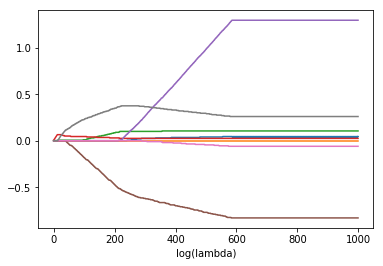

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(stageWiseWeights)
plt.xlabel('log(lambda)')
plt.show()